(322757, 63)
   cust_access_net_dt  credit_level  membership_level  gender  birth_date  cust_point  inet_pd_inst_cnt  star_level  dt_m_1000  dt_m_1003  ...  app6_visits  app7_visits  app8_visits  product_nbr   open_date  last_year_capture_user_flag  pro_brand     term_model  register_date  market_price
0        2.015063e+13          -1.0            9999.0     2.0  19680409.0      9004.0               5.0      1300.0         71       5733  ...          3.0         73.0         16.0  Z1180000045  20150630.0                            0        TCL  TCL-TCLCF203C     2019-09-29         199.0
1        2.006060e+13      100100.0            9999.0     1.0  19451222.0       357.0               4.0      1200.0         55      17347  ...          0.0          0.0          0.0     10151010  20120213.0                            0         欧珀    OB-OPPO R7c     2019-04-14        2499.0
2        2.014071e+13          -1.0            9999.0     1.0  19730606.0      6272.0               5.0      1500.

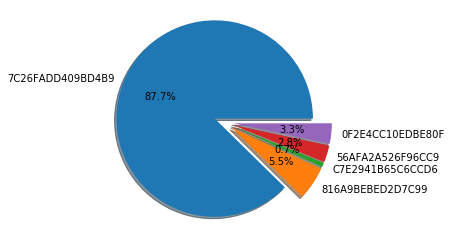

In [1]:
# -*- coding: UTF-8 -*-
"""
数据描述统计
探索变量
"""

# 保证脚本与Python3兼容
from __future__ import print_function

import os   #读取数据文件
import sys
#import pymysql 
from sqlalchemy import create_engine
 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split  #划分训练集测试集使用
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.linear_model import LogisticRegression ,LogisticRegressionCV
#from sklearn.linear_model.coordinate_descent import ConvergenceWarning
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder,KBinsDiscretizer
from sklearn.impute import SimpleImputer 
from sklearn import metrics
from sklearn.feature_extraction import DictVectorizer #特征转换器
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from collections import Counter
%matplotlib inline
import warnings

warnings.filterwarnings("ignore")

def readData(path):
    """
    使用pandas读取数据
    """
    data = pd.read_csv(path)
    cols = list(data.columns.values)
    return data[cols]
    

def visualData(data):
    """
    画直方图，直观了解数据
    """
    data.hist(
        rwidth=0.9, grid=True, figsize=(8, 8), alpha=0.6,bins=10, color="blue")
    plt.show()



def sample_class_show(y,savepath='res.png'):
    '''
    绘制饼图，y是标签列表
    '''
    target_stats=Counter(y)
    labels=list(target_stats.keys())
    sizes = list(target_stats.values())
    explode=tuple([0.1]*len(target_stats))
    fig,ax  = plt.subplots()
    ax.pie(sizes,explode=explode,labels=labels,shadow=True,autopct='%1.1f%%')
    ax.axis('equal')
    plt.savefig(savepath)
 
def analyseData(data):
    """
    通过统计方法，了解数据性质
    """
    # 在Windows下运行此脚本需确保Windows下的命令提示符(cmd)能显示中文
    print("显示基本统计信息：")
    print(data.describe(include="all"))
    # 计算age, is_succ交叉报表,qcut按分位数分箱
 

    visualData(data[[ 'credit_level' ,'cust_point','inet_pd_inst_cnt' ,'star_level']])
    cross1 = pd.crosstab(data["credit_level"], data["label"])
    print("显示credit_level,  label交叉报表：")
    print(cross1)
    cross1.plot(kind="bar", color=["#C6E2FF", "0.45"], rot=0)
          
    cross2 = pd.crosstab(data["inet_pd_inst_cnt"], data["label"])
    print("显示inet_pd_inst_cnt,  label交叉报表：")
    print(cross2)
    cross2.plot(kind="bar", color=["#C6E2FF", "0.45"], rot=0)
       
    cross3 = pd.crosstab(data["cust_point"], data["label"])
    print("显示cust_point,  label交叉报表：")
    print(cross3)
    cross3.plot(kind="bar", color=["#C6E2FF", "0.45"], rot=0)
    
    plt.show()

    
if __name__ == "__main__":
    # 设置显示格式
    pd.set_option('display.width', 3000)
    homePath = os.path.dirname(os.path.abspath('__file__'))
    # Windows下的存储路径与Linux并不相同
    if os.name == "nt":
        dataPath = "%s\\train.csv" % homePath
    else:
        dataPath = "%s/train.csv" % homePath
    data = readData(dataPath)
    #data = data.drop_duplicates()
    #features = data.columns.tolist()
    #print(features)
    features = ['cust_access_net_dt', 'credit_level', 'membership_level', 'gender', 'birth_date', 'cust_point', 'inet_pd_inst_cnt', 'star_level'
                , 'dt_m_1000', 'dt_m_1003', 'dt_m_1004', 'dt_m_1005', 'dt_m_1006', 'dt_m_1009', 'dt_m_1011', 'dt_m_1012', 'dt_m_1015', 'dt_m_1017', 'dt_m_1027', 'dt_m_1028', 'dt_m_1032', 'dt_m_1034', 'dt_m_1035', 'dt_m_1041', 'dt_m_1043', 'dt_m_1051', 'dt_m_1052', 'dt_m_1067', 'dt_m_1068', 'dt_m_1073', 'dt_m_1074', 'dt_m_1075', 'dt_m_1085', 'dt_m_1086', 'dt_m_1087', 'dt_m_1096', 'dt_m_1099', 'dt_m_1102', 'dt_m_1105', 'dt_m_1108', 'dt_m_1111', 'dt_m_1594', 'dt_m_1601', 'dt_m_1617', 'dt_m_1618', 'dt_m_1620', 'dt_m_1630', 'dt_m_1633'
                , 'app1_visits', 'app2_visits', 'app3_visits', 'app4_visits', 'app5_visits', 'app6_visits', 'app7_visits', 'app8_visits'
                , 'product_nbr', 'open_date', 'last_year_capture_user_flag'
                , 'pro_brand', 'term_model', 'register_date', 'market_price']
    
    
    
    tried = ['credit_level','cust_point','inet_pd_inst_cnt','star_level','dt_m_1004', 'dt_m_1005', 'dt_m_1006', 'dt_m_1009', 'dt_m_1011', 
             'dt_m_1027', 'dt_m_1028', 'dt_m_1032', 'dt_m_1034', 'dt_m_1035', 'dt_m_1041',
             'dt_m_1052', 'dt_m_1067', 'dt_m_1068', 'dt_m_1073', 'dt_m_1074', 'dt_m_1075', 
             'dt_m_1085', 'dt_m_1086', 'dt_m_1087','dt_m_1102', 'dt_m_1105', 'dt_m_1630',
             'app1_visits', 'app2_visits', 'app3_visits', 'app4_visits', 'app5_visits', 'app6_visits', 'app7_visits', 'app8_visits',
             'product_nbr','last_year_capture_user_flag','market_price' ]
     
    #查看样本数和特征数
    print(data[features].shape)
    
     # 查看数据的前5行
    print(data[features].head())
    # 查看每一列的计数及数据类型等信息
    print(data[features].info())
    # 查看总体统计信息
    print(data[features].describe())
    
    print(data['label'].value_counts())
    #可视化
    sample_class_show(data['label'],savepath='label_distribution.png')
    #超过80%为7C26FADD409BD4B9

### 数据质量分析

In [2]:
#缺失值
na=pd.DataFrame()

dd=[]
cc=[]
rr=[]

for i in features:
    d=len(data)-data[i].count()
    r=(d/len(data))*100
    rate='%.2f%%' % r
    print('字段名为：',str(i).ljust(10),#'字段类型： ',data[i].dtype,
          '缺失值数量:',str(d).ljust(4),'缺失数量占比：',rate) #这里print主要是为了在脚本中观察是否获取到想要的数据，方便调试。
    dd.append(i)
    cc.append(d)
    rr.append(rate)

na[u'字段名为']=dd
na[u'缺失值数量']=cc
na[u'缺失数量占比']=rr

字段名为： cust_access_net_dt 缺失值数量: 845  缺失数量占比： 0.26%
字段名为： credit_level 缺失值数量: 845  缺失数量占比： 0.26%
字段名为： membership_level 缺失值数量: 845  缺失数量占比： 0.26%
字段名为： gender     缺失值数量: 845  缺失数量占比： 0.26%
字段名为： birth_date 缺失值数量: 78792 缺失数量占比： 24.41%
字段名为： cust_point 缺失值数量: 845  缺失数量占比： 0.26%
字段名为： inet_pd_inst_cnt 缺失值数量: 845  缺失数量占比： 0.26%
字段名为： star_level 缺失值数量: 845  缺失数量占比： 0.26%
字段名为： dt_m_1000  缺失值数量: 0    缺失数量占比： 0.00%
字段名为： dt_m_1003  缺失值数量: 0    缺失数量占比： 0.00%
字段名为： dt_m_1004  缺失值数量: 0    缺失数量占比： 0.00%
字段名为： dt_m_1005  缺失值数量: 0    缺失数量占比： 0.00%
字段名为： dt_m_1006  缺失值数量: 0    缺失数量占比： 0.00%
字段名为： dt_m_1009  缺失值数量: 0    缺失数量占比： 0.00%
字段名为： dt_m_1011  缺失值数量: 0    缺失数量占比： 0.00%
字段名为： dt_m_1012  缺失值数量: 0    缺失数量占比： 0.00%
字段名为： dt_m_1015  缺失值数量: 0    缺失数量占比： 0.00%
字段名为： dt_m_1017  缺失值数量: 0    缺失数量占比： 0.00%
字段名为： dt_m_1027  缺失值数量: 0    缺失数量占比： 0.00%
字段名为： dt_m_1028  缺失值数量: 0    缺失数量占比： 0.00%
字段名为： dt_m_1032  缺失值数量: 0    缺失数量占比： 0.00%
字段名为： dt_m_1034  缺失值数量: 0    缺失数量占比： 0.00%
字段名为： dt_m_1035  缺失值数量: 0    缺

## 初步探索

从确实值个数可以总体初步猜测
cust数据有部分空值，cust的数据有空值和异常值而通话正常的话可以推测是潜在诈骗机主，信息是乱编的等问题 ，也可能是异常可以删除
dt_m等的数据即通话数据没有空值，这个是分析的主要数据部分，基本是分钟数，所以基本是int型
app_visits 的数据比较一致，而且从业务分析基本是相关性不大，或是有某些通用的APP会使用，一部分设备没上网，这些可能是专门用来通话，如果和label相关度大就需要用一个值填充,为空就默认用0 ，说明没有访问；
open_date有个别空值，终端数据也是有部分都缺失，个数比较一致304238，基本来说也是次相关属性；
接下来按各个数据字段分类进一步分析

### 客户数据探索

In [5]:
data['membership_level'].describe()  #membership_level 基本没有区分度，不选择
print(data['membership_level'].value_counts())
#分析类别型变量和类别型变量之间的关系


9999.0    318950
1200.0      2668
1100.0       212
1000.0        82
Name: membership_level, dtype: int64


cust部分先选择 'credit_level','cust_point','inet_pd_inst_cnt','star_level' 比较有意义的变量

In [6]:
#credit_level为离散变量需要向量化,空值nan填充一个类 0
print(data['credit_level'].describe())
data['credit_level'].unique()


count    321912.000000
mean     394639.829453
std      460172.736017
min          -1.000000
25%          -1.000000
50%      100200.000000
75%      999999.000000
max      999999.000000
Name: credit_level, dtype: float64


array([-1.00000e+00,  1.00100e+05,  9.99999e+05,  1.00200e+05,
        1.10100e+05,  1.00300e+05,  1.00400e+05,          nan])

In [7]:
print(data['star_level'].describe())
data['star_level'].unique()

count    321912.000000
mean       1488.779955
std         510.058182
min        1100.000000
25%        1300.000000
50%        1400.000000
75%        1500.000000
max        9999.000000
Name: star_level, dtype: float64


array([1300., 1200., 1500., 1400., 2100., 2200., 1100., 1600., 9999.,
       1700.,   nan])

In [8]:
#cust_point 异常值用0替代
print(data['cust_point'].describe())
data['cust_point'].unique()
#会员级别没什么区分度
data['membership_level'].value_counts()

count    3.219120e+05
mean     6.079050e+03
std      9.675468e+04
min     -6.067000e+03
25%      4.550000e+02
50%      2.108000e+03
75%      5.109000e+03
max      1.562282e+07
Name: cust_point, dtype: float64


9999.0    318950
1200.0      2668
1100.0       212
1000.0        82
Name: membership_level, dtype: int64

#### 在网产品个数，基本是有限的几个整数
后期可转分类变量，再独热编码

count    321912.000000
mean         10.684063
std         205.857441
min           0.000000
25%           1.000000
50%           4.000000
75%           6.000000
max       34689.000000
Name: inet_pd_inst_cnt, dtype: float64


7C26FADD409BD4B9    1408
816A9BEBED2D7C99    1002
56AFA2A526F96CC9     354
0F2E4CC10EDBE80F     110
C7E2941B65C6CCD6       5
Name: label, dtype: int64

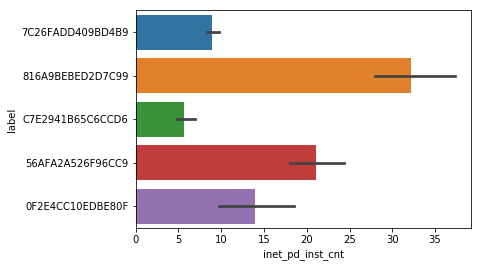

In [9]:
#无在用产品但是有使用数据基本是异常了，需要用1填充或是丢弃掉，如果做特征可以分箱
print(data['inet_pd_inst_cnt'].describe())
data['inet_pd_inst_cnt'].value_counts()
import seaborn as sns
sns.barplot(x='inet_pd_inst_cnt',y='label',data=data)
#看到最后一类别的产品数就很少，如果产品数量越大，就越少概率是这类
data[data['inet_pd_inst_cnt']>35]['label'].value_counts()


### 客户生日字段 birth_date 探索
客户生日需要转为年龄age，相对于其他项目，这是分析诈骗也是一种异常检测的分类，缺失和异常值可能也是值得参考的，比如故意为了来诈骗广告而隐瞒或是批量开的，所以统一指派为新的一类值，比如-1

In [10]:
data.birth_date.head()
data.birth_date.value_counts()
data.birth_date.describe()

count    2.439650e+05
mean     1.980147e+07
std      4.117610e+05
min      1.899123e+07
25%      1.971011e+07
50%      1.980083e+07
75%      1.988091e+07
max      3.000010e+07
Name: birth_date, dtype: float64

In [11]:
import datetime as dt
from dateutil.parser import parse
print(data['birth_date'][1]) 
year = int(data['birth_date'][1]/10000)
month  =  int((data['birth_date'][1]-year*10000)/100)
day = int((data['birth_date'][1]-year*10000-month*100))

b=str(year*10000+month*100+day)
c=parse(b)
print(c)

now_year = dt.datetime.today().year
print(now_year-c.year)

print(year,month,day)

19451222.0
1945-12-22 00:00:00
75
1945 12 22


In [16]:
import datetime as dt

#data.drop('age',axis=1,inplace=True)
#data['birth_date'].fillna(value = data['birth_date'].median(),inplace=True)
data['birth_date'].fillna(value = 30000000 ,inplace=True) #空值让她和异常值一类，都使得age变为-1，所以设为负数
data.insert(0,'age',np.zeros(len(data['birth_date'])))
now_year = dt.datetime.today().year
def get_year(x):
    return int(x/10000)
data['age'] = data.apply(lambda x:now_year-get_year( x['birth_date']),axis=1)
print(data['age'][:20])   
#年龄异常可能是错误数据，猜测是否是用于诈骗的
data.loc[data['age']<=0,'age'] = -1 #data['age'].median()  

print(data['age'].describe())
print(data['age'][:20])

0      52
1      75
2      47
3      56
4      32
5      33
6      47
7    -980
8      45
9      49
10     38
11     48
12     49
13     43
14     60
15     35
16     27
17   -980
18     54
19   -980
Name: age, dtype: int64
count    322757.000000
mean         31.023436
std          21.282152
min          -1.000000
25%          19.000000
50%          34.000000
75%          46.000000
max         121.000000
Name: age, dtype: float64
0     52
1     75
2     47
3     56
4     32
5     33
6     47
7     -1
8     45
9     49
10    38
11    48
12    49
13    43
14    60
15    35
16    27
17    -1
18    54
19    -1
Name: age, dtype: int64


In [17]:
data.loc[data['age']<=0]['label'].value_counts()

7C26FADD409BD4B9    63356
816A9BEBED2D7C99     7855
0F2E4CC10EDBE80F     5269
56AFA2A526F96CC9     2165
C7E2941B65C6CCD6      507
Name: label, dtype: int64

### 用impute替换空值
missing_values：  缺失值是什么，默认为np.nan

strategy ：填补缺失值策略，均值 、0、中位数等

fill_values： 当strategy为constant时可用

copy：默认为true，将此件特征矩阵副本，反之则填充原来的矩阵

In [18]:
#用sklearn的库
Age = data['age'].values.reshape(-1,1)  #sklearn中特征矩阵必须是二维
Age[:10]
 
from sklearn.impute import SimpleImputer  
imp_mean = SimpleImputer(missing_values=-1)  #实例化，默认用均值填充（连续）
imp_median = SimpleImputer(missing_values=-1,strategy = "median")  #用中位数填充（连续）
imp_mode = SimpleImputer(strategy = "most_frequent") #用众数填充（分类）
imp_0 = SimpleImputer(missing_values=-1,strategy="constant",fill_value=0) #用0填充（连续）

#fit_transform一步完成调取结果
imp_mean = imp_mean.fit_transform(Age)
imp_median = imp_median.fit_transform(Age)
imp_0 = imp_0.fit_transform(Age)

print(imp_mean[:20])
print(imp_median[:20])
print(imp_0[:20])

[[52.        ]
 [75.        ]
 [47.        ]
 [56.        ]
 [32.        ]
 [33.        ]
 [47.        ]
 [41.42847232]
 [45.        ]
 [49.        ]
 [38.        ]
 [48.        ]
 [49.        ]
 [43.        ]
 [60.        ]
 [35.        ]
 [27.        ]
 [41.42847232]
 [54.        ]
 [41.42847232]]
[[52.]
 [75.]
 [47.]
 [56.]
 [32.]
 [33.]
 [47.]
 [40.]
 [45.]
 [49.]
 [38.]
 [48.]
 [49.]
 [43.]
 [60.]
 [35.]
 [27.]
 [40.]
 [54.]
 [40.]]
[[52]
 [75]
 [47]
 [56]
 [32]
 [33]
 [47]
 [ 0]
 [45]
 [49]
 [38]
 [48]
 [49]
 [43]
 [60]
 [35]
 [27]
 [ 0]
 [54]
 [ 0]]


## 连续型变量划分为分类变量
preprocessing.KBinsDiscretizer

n_bins ：每个特征中分箱的个数，默认5，一次会被运用到所有导入的特征

encode：编码的方式，默认“onehot”，”encode=ordinal”：每个特征的每个箱都被编码为一个整数，返回每一列是一个特征，每个特征下含有不同整数编码的箱的矩阵"encode=onehot-dense"：做哑变量，之后返回一个密集数组

strategy：用来定义箱宽的方式，默认"quantile"，"uniform"：表示等宽分箱；"quantile"：表示等位分箱，即每个特征中的每个箱内的样本数量都相同；"kmeans"：表示按聚类分箱，每个箱中的值到最近的一维k均值聚类的簇心得距离都相同

In [19]:
from sklearn.preprocessing import KBinsDiscretizer
X = data['age'].values.reshape(-1,1)
est = KBinsDiscretizer(n_bins=3,encode='ordinal',strategy='uniform')
est.fit_transform(X)
#查看转换后的分箱，变成一列中的三箱
set(est.fit_transform(X).ravel())
 

est = KBinsDiscretizer(n_bins=3,encode='onehot',strategy='uniform')
#变成哑变量
Y = est.fit_transform(X).toarray()
print(Y[:20])
#看每个类别是否数量一样
Y.sum(0)
data['age'].value_counts()

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


-1      79152
 33      8886
 32      8416
 31      8412
 34      8283
        ...  
 6          1
 4          1
 114        1
 109        1
 100        1
Name: age, Length: 104, dtype: int64

### 使用pandas 并画频率分布图

使用cut分箱，并统计各分段内的某一事件发生概率


In [20]:
#使用cut 函数将连续变量转换为分类变量
def binning(col,cut_points,labels=None,isright=True):
    valmin=col.min()
    valmax=col.max()
    break_points =  [valmin]+cut_points + [valmax]
    if not labels:
        labels = range(len(cut_points) + 1)
    else:
        labels = [str(i+1)+':'+labels[i] for i in range(len(cut_points) + 1)]
    colbin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True,right=isright)
    return colbin

    age             label        age_bins
0    52  7C26FADD409BD4B9           6:old
1    75  7C26FADD409BD4B9           6:old
2    47  7C26FADD409BD4B9         5:auldt
3    56  7C26FADD409BD4B9           6:old
4    32  7C26FADD409BD4B9  4:military_age
5    33  7C26FADD409BD4B9  4:military_age
6    47  7C26FADD409BD4B9         5:auldt
7    -1  816A9BEBED2D7C99       1:iilegal
8    45  7C26FADD409BD4B9         5:auldt
9    49  7C26FADD409BD4B9         5:auldt
10   38  7C26FADD409BD4B9  4:military_age
11   48  7C26FADD409BD4B9         5:auldt
12   49  7C26FADD409BD4B9         5:auldt
13   43  C7E2941B65C6CCD6         5:auldt
14   60  7C26FADD409BD4B9           6:old
15   35  7C26FADD409BD4B9  4:military_age
16   27  7C26FADD409BD4B9          3:teen
17   -1  7C26FADD409BD4B9       1:iilegal
18   54  7C26FADD409BD4B9           6:old
19   -1  7C26FADD409BD4B9       1:iilegal
label           0F2E4CC10EDBE80F  56AFA2A526F96CC9  7C26FADD409BD4B9  816A9BEBED2D7C99  C7E2941B65C6CCD6
age_bins     

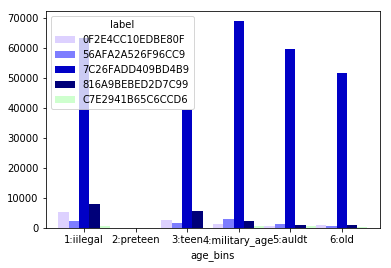

In [7]:
#尽量不要在原始数据集中更改数据
tmp = data[['age','label']]

cut_points = [0,10,30,40,50] 
labels = ['iilegal','preteen','teen','military_age','auldt','old']
tmp['age_bins']= binning(data['age'],cut_points,labels)

print(tmp[:20])

#交叉表
cross3 = pd.crosstab(tmp['age_bins'],data['label'])
print(cross3)
#cross3.plot(kind="bar", color=["#C6E2FF", "0.45"], rot=0)
cross3.plot(kind='bar',color=['#DDD1FF','#7D7DFF','#0000C6','#000079','#CEFFCE'],width=1 ,rot=0)
plt.show()         

## 二值化
age大于0为一类，小于0为一类，
小于0 就是原来为0，空值和异常值等



In [21]:
#导二值化包（特征专用）
from sklearn.preprocessing import Binarizer
##提取年龄，要.reshape(-1,1)变为一列
X = data['age'].values.reshape(-1,1)

#将年龄二值化
transformer = Binarizer(threshold=0).fit_transform(X) #threshold = 0是阈值，大于0为1，小于0为0
transformer[:20]


array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0]])

### 通话数据分析
对于通话数据基本是秒的整数倍数是int型，平均和占比为浮点数，空值均用0填充;
通过数据还有些异常，比如前三个月和前一个月不一致，这些先不考虑

12127


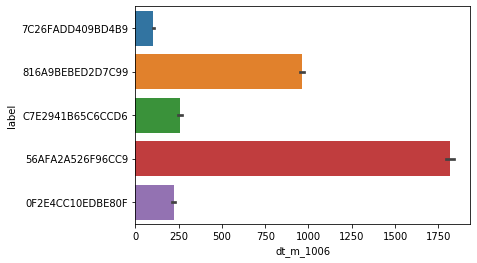

In [31]:
#探索
import seaborn as sns
sns.barplot(x='dt_m_1006',y='label',data=data)
print(data['dt_m_1006'].max())


In [ ]:
 
cross4 = pd.crosstab(pd.cut(data["dt_m_1051"],  [0,32,150, 180, 900, 1200]), data["label"])
print("显示本月主叫通话人数, label交叉报表：")
print(cross4) 
cross4.plot(kind="bar", color=["#C6E2FF", "0.45"], rot=0)
  
plt.show()

dt_m_1004 label               0F2E4CC10EDBE80F  56AFA2A526F96CC9  7C26FADD409BD4B9  816A9BEBED2D7C99  C7E2941B65C6CCD6
cut                                                                                                         
[0.0, 5091.0)                  10727              8896            282383             17619              2290
[5091.0, 10181.0)                 57                57               505               177                 3
[10181.0, 15272.0)                 4                 1                14                15                 0
[15272.0, 20362.0)                 2                 0                 1                 1                 0
[20362.0, 25478.0)                 2                 0                 3                 0                 0


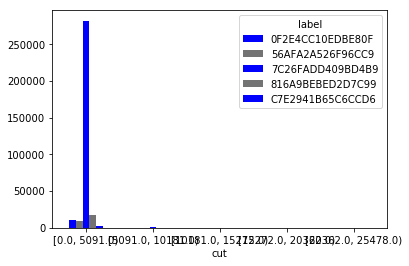

dt_m_1005 label                 0F2E4CC10EDBE80F  56AFA2A526F96CC9  7C26FADD409BD4B9  816A9BEBED2D7C99  C7E2941B65C6CCD6
cut                                                                                                           
[0.0, 25060.0)                   10710              8948            282742             17778              2293
[25060.0, 50120.0)                  81                 5               151                32                 0
[50120.0, 75179.0)                   1                 0                11                 1                 0
[75179.0, 100239.0)                  0                 0                 2                 0                 0
[100239.0, 125424.0)                 0                 1                 0                 1                 0


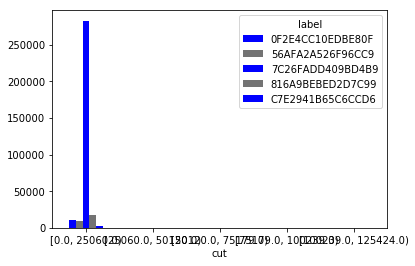

dt_m_1006 label              0F2E4CC10EDBE80F  56AFA2A526F96CC9  7C26FADD409BD4B9  816A9BEBED2D7C99  C7E2941B65C6CCD6
cut                                                                                                        
[2.0, 2427.0)                 10723              6635            282881             16883              2289
[2427.0, 4852.0)                 54              2221                25               865                 3
[4852.0, 7277.0)                 11                97                 0                51                 1
[7277.0, 9702.0)                  4                 1                 0                11                 0
[9702.0, 12139.0)                 0                 0                 0                 2                 0


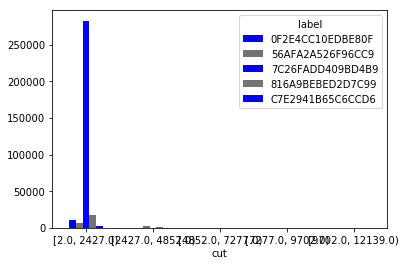

dt_m_1009 label                 0F2E4CC10EDBE80F  56AFA2A526F96CC9  7C26FADD409BD4B9  816A9BEBED2D7C99  C7E2941B65C6CCD6
cut                                                                                                           
[0.0, 152717.0)                  10757              8914            282839             17648              2290
[152717.0, 305435.0)                29                39                62               149                 3
[305435.0, 458152.0)                 4                 1                 2                14                 0
[458152.0, 610870.0)                 0                 0                 1                 1                 0
[610870.0, 764351.0)                 2                 0                 2                 0                 0


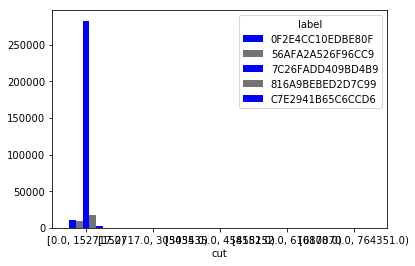

dt_m_1011 label                0F2E4CC10EDBE80F  56AFA2A526F96CC9  7C26FADD409BD4B9  816A9BEBED2D7C99  C7E2941B65C6CCD6
cut                                                                                                          
[0.0, 22119.0)                  10668              8949            282780             17766              2293
[22119.0, 44238.0)                123                 4               109                45                 0
[44238.0, 66357.0)                  1                 0                16                 1                 0
[66357.0, 88476.0)                  0                 0                 1                 0                 0
[88476.0, 110706.0)                 0                 1                 0                 0                 0


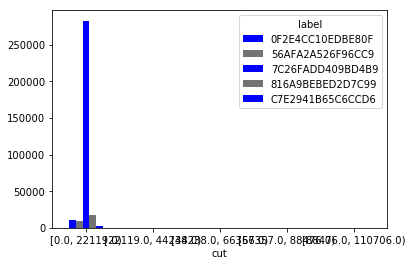

dt_m_1027 label         0F2E4CC10EDBE80F  56AFA2A526F96CC9  7C26FADD409BD4B9  816A9BEBED2D7C99  C7E2941B65C6CCD6
cut                                                                                                   
[0.0, 6.0)               10302              8830            197485             17405              2204
[6.0, 12.0)                402               103             72166               343                82
[12.0, 17.0)                62                20             12064                52                 7
[17.0, 23.0)                20                 1              1154                12                 0
[23.0, 29.0)                 6                 0                37                 0                 0


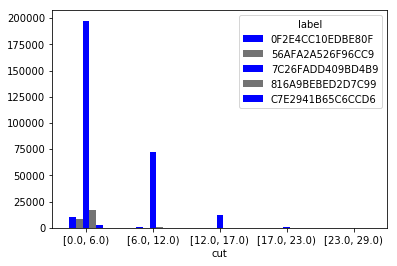

dt_m_1028 label         0F2E4CC10EDBE80F  56AFA2A526F96CC9  7C26FADD409BD4B9  816A9BEBED2D7C99  C7E2941B65C6CCD6
cut                                                                                                   
[0.0, 6.0)                9799              8124            215131             10889              1873
[6.0, 12.0)                719               612             57021              4261               331
[12.0, 19.0)               170               134              9154              1654                75
[19.0, 25.0)                60                36              1236               641                11
[25.0, 31.0)                44                48               364               367                 3


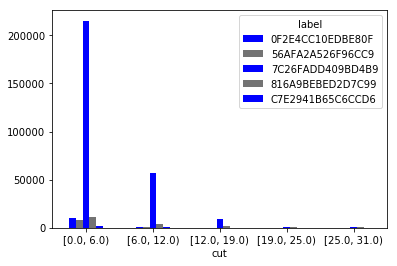

dt_m_1032 label       0F2E4CC10EDBE80F  56AFA2A526F96CC9  7C26FADD409BD4B9  816A9BEBED2D7C99  C7E2941B65C6CCD6
cut                                                                                                 
[0.0, 0.2)              9754              1981            272768              9028              2044
[0.2, 0.4)               771              2799              9213              6000               232
[0.4, 0.6)               214              2521               794              2169                15
[0.6, 0.8)                30              1275                96               524                 2
[0.8, 1.0)                23               378                35                91                 0


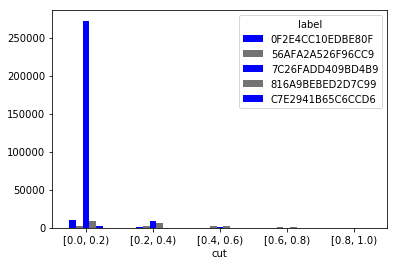

dt_m_1034 label       0F2E4CC10EDBE80F  56AFA2A526F96CC9  7C26FADD409BD4B9  816A9BEBED2D7C99  C7E2941B65C6CCD6
cut                                                                                                 
[0.0, 0.2)              3340                90             32152               333                23
[0.2, 0.4)              3799               251            140197              1312               338
[0.4, 0.6)              1825               331             89458              2383               953
[0.6, 0.8)              1187              1078             18657              4739               854
[0.8, 1.0)               641              7204              2442              9045               125


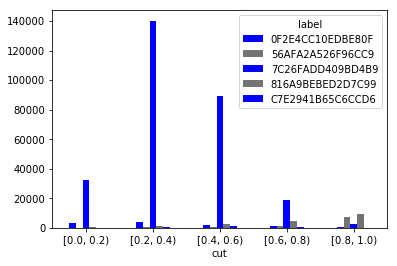

dt_m_1035 label       0F2E4CC10EDBE80F  56AFA2A526F96CC9  7C26FADD409BD4B9  816A9BEBED2D7C99  C7E2941B65C6CCD6
cut                                                                                                 
[0.0, 0.2)               409                 1              1593                15                 0
[0.2, 0.4)              2746                 9             19458               146                10
[0.4, 0.6)              3262                93             93774               777               153
[0.6, 0.8)              2409               343            124857              2314               864
[0.8, 1.0)              1966              8508             43224             14560              1266


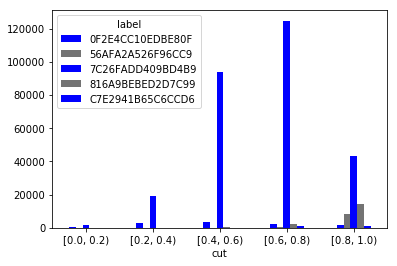

dt_m_1041 label              0F2E4CC10EDBE80F  56AFA2A526F96CC9  7C26FADD409BD4B9  816A9BEBED2D7C99  C7E2941B65C6CCD6
cut                                                                                                        
[1.0, 2447.0)                 10727              8661            282903             16997              2292
[2447.0, 4893.0)                 50               289                 3               762                 0
[4893.0, 7340.0)                 11                 4                 0                42                 1
[7340.0, 9786.0)                  4                 0                 0                 9                 0
[9786.0, 12244.0)                 0                 0                 0                 2                 0


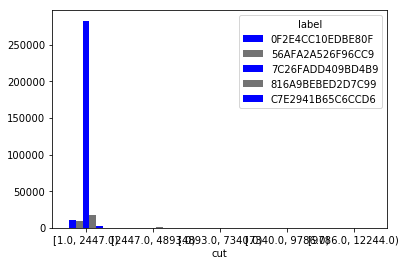

dt_m_1043 label               0F2E4CC10EDBE80F  56AFA2A526F96CC9  7C26FADD409BD4B9  816A9BEBED2D7C99  C7E2941B65C6CCD6
cut                                                                                                         
[-1.0, 5438.0)                 10703              8807            282903             17053              2292
[5438.0, 10877.0)                 69               144                 2               695                 1
[10877.0, 16317.0)                16                 3                 1                53                 0
[16317.0, 21756.0)                 4                 0                 0                 9                 0
[21756.0, 27222.0)                 0                 0                 0                 2                 0


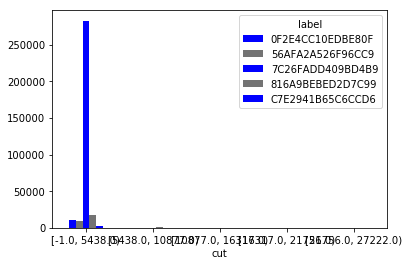

dt_m_1052 label               0F2E4CC10EDBE80F  56AFA2A526F96CC9  7C26FADD409BD4B9  816A9BEBED2D7C99  C7E2941B65C6CCD6
cut                                                                                                         
[-1.0, 5307.0)                 10703              8827            282903             17042              2292
[5307.0, 10615.0)                 67               124                 2               705                 1
[10615.0, 15924.0)                18                 3                 1                52                 0
[15924.0, 21232.0)                 4                 0                 0                11                 0
[21232.0, 26567.0)                 0                 0                 0                 2                 0


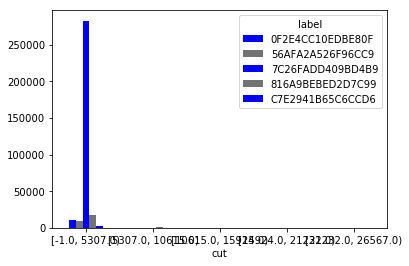

dt_m_1067 label           0F2E4CC10EDBE80F  56AFA2A526F96CC9  7C26FADD409BD4B9  816A9BEBED2D7C99  C7E2941B65C6CCD6
cut                                                                                                     
[1.0, 63.0)                 8049              5649            282555             12164              2282
[63.0, 125.0)               1702              2676               274              2888                 5
[125.0, 187.0)               647               467                62              1241                 2
[187.0, 249.0)               284               125                15              1054                 1
[249.0, 311.0)               110                37                 0               465                 3


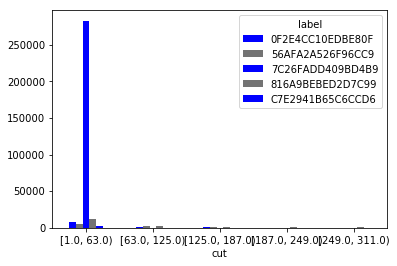

dt_m_1068 label           0F2E4CC10EDBE80F  56AFA2A526F96CC9  7C26FADD409BD4B9  816A9BEBED2D7C99  C7E2941B65C6CCD6
cut                                                                                                     
[-1.0, 63.0)                7696              3090            281866              9943              2269
[63.0, 127.0)               1819              4459               824              4193                15
[127.0, 192.0)               673              1045               161              1436                 4
[192.0, 256.0)               376               271                45              1229                 1
[256.0, 320.0)               228                89                10              1011                 4


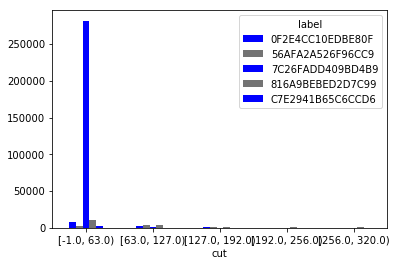

dt_m_1073 label             0F2E4CC10EDBE80F  56AFA2A526F96CC9  7C26FADD409BD4B9  816A9BEBED2D7C99  C7E2941B65C6CCD6
cut                                                                                                       
[0.0, 1834.0)                10656              5124            282689             15960              2283
[1834.0, 3669.0)               114              3186               212              1694                 9
[3669.0, 5503.0)                20               602                 5               139                 0
[5503.0, 7338.0)                 2                40                 0                16                 1
[7338.0, 9181.0)                 0                 2                 0                 3                 0


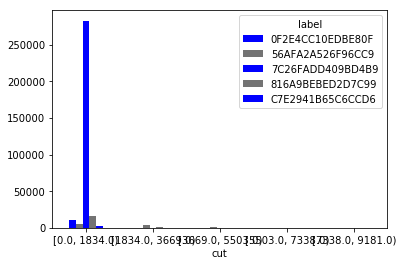

dt_m_1074 label             0F2E4CC10EDBE80F  56AFA2A526F96CC9  7C26FADD409BD4B9  816A9BEBED2D7C99  C7E2941B65C6CCD6
cut                                                                                                       
[0.0, 624.0)                 10740              8115            282841             17498              2290
[624.0, 1248.0)                 38               702                60               264                 2
[1248.0, 1871.0)                 9               114                 5                40                 1
[1871.0, 2495.0)                 5                18                 0                 8                 0
[2495.0, 3122.0)                 0                 5                 0                 2                 0


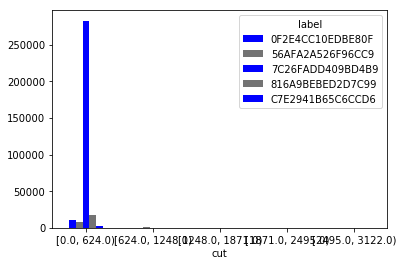

dt_m_1075 label             0F2E4CC10EDBE80F  56AFA2A526F96CC9  7C26FADD409BD4B9  816A9BEBED2D7C99  C7E2941B65C6CCD6
cut                                                                                                       
[0.0, 441.0)                 10769              8913            282844             17802              2291
[441.0, 883.0)                  21                36                55                10                 2
[883.0, 1324.0)                  2                 4                 4                 0                 0
[1324.0, 1766.0)                 0                 1                 2                 0                 0
[1766.0, 2209.0)                 0                 0                 1                 0                 0


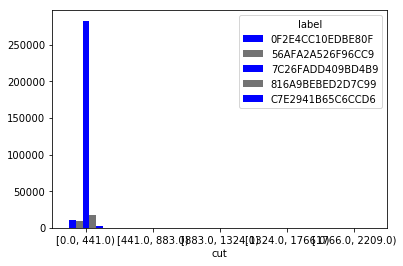

dt_m_1085 label       0F2E4CC10EDBE80F  56AFA2A526F96CC9  7C26FADD409BD4B9  816A9BEBED2D7C99  C7E2941B65C6CCD6
cut                                                                                                 
[0.0, 0.2)               224                42               929                32                53
[0.2, 0.4)               273               108              7432                98               163
[0.4, 0.6)               952               482             52567               517               450
[0.6, 0.8)              2656              1615            148729              2571              1159
[0.8, 1.0)              6687              6707             73249             14594               468


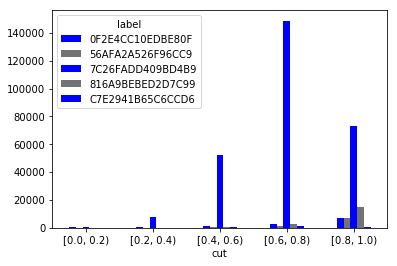

dt_m_1086 label       0F2E4CC10EDBE80F  56AFA2A526F96CC9  7C26FADD409BD4B9  816A9BEBED2D7C99  C7E2941B65C6CCD6
cut                                                                                                 
[0.0, 0.2)              7090              6792            114140             14740              1019
[0.2, 0.4)              2814              1795            144231              2598              1204
[0.4, 0.6)               660               286             22252               382                69
[0.6, 0.8)               127                60              2071                69                 0
[0.8, 1.0)               101                21               212                23                 1


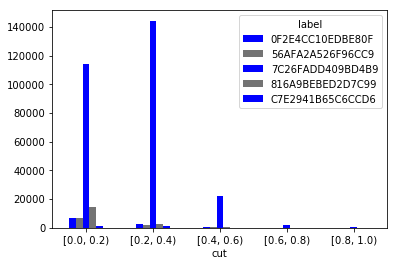

dt_m_1087 label       0F2E4CC10EDBE80F  56AFA2A526F96CC9  7C26FADD409BD4B9  816A9BEBED2D7C99  C7E2941B65C6CCD6
cut                                                                                                 
[0.0, 0.2)             10338              8844            267885             17728              1809
[0.2, 0.4)               234                79             13256                69               350
[0.4, 0.6)               115                22              1477                10               104
[0.6, 0.8)                56                 9               241                 3                27
[0.8, 1.0)                49                 0                47                 2                 3


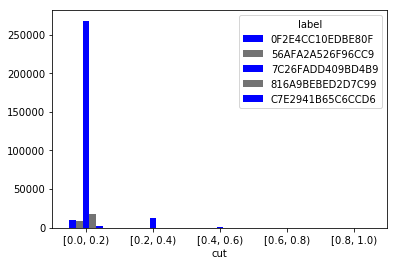

dt_m_1102 label             0F2E4CC10EDBE80F  56AFA2A526F96CC9  7C26FADD409BD4B9  816A9BEBED2D7C99  C7E2941B65C6CCD6
cut                                                                                                       
[0.0, 1697.0)                10682              8803            282902             17060              2290
[1697.0, 3394.0)                81               132                 4               688                 3
[3394.0, 5092.0)                14                16                 0                48                 0
[5092.0, 6789.0)                 7                 3                 0                 8                 0
[6789.0, 8494.0)                 8                 0                 0                 8                 0


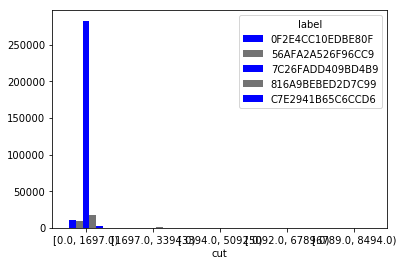

dt_m_1105 label                 0F2E4CC10EDBE80F  56AFA2A526F96CC9  7C26FADD409BD4B9  816A9BEBED2D7C99  C7E2941B65C6CCD6
cut                                                                                                           
[0.0, 151495.0)                  10765              8945            282895             17738              2291
[151495.0, 302990.0)                22                 9                 9                63                 2
[302990.0, 454485.0)                 3                 0                 0                10                 0
[454485.0, 605980.0)                 0                 0                 0                 1                 0
[605980.0, 758232.0)                 2                 0                 2                 0                 0


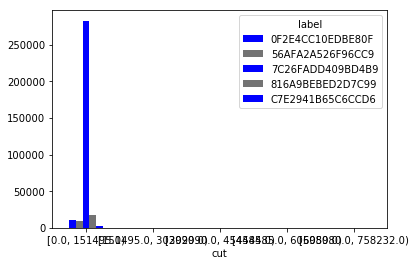

dt_m_1630 label               0F2E4CC10EDBE80F  56AFA2A526F96CC9  7C26FADD409BD4B9  816A9BEBED2D7C99  C7E2941B65C6CCD6
cut                                                                                                         
[0.0, 11576.0)                 10787              8954            282906             17811              2293
[11576.0, 23151.0)                 1                 0                 0                 1                 0
[23151.0, 34727.0)                 1                 0                 0                 0                 0
[46302.0, 57936.0)                 3                 0                 0                 0                 0


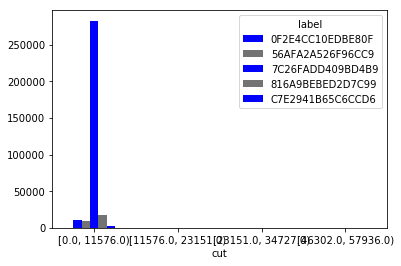

In [29]:
for var in ['dt_m_1004', 'dt_m_1005', 'dt_m_1006', 'dt_m_1009', 'dt_m_1011', 
             'dt_m_1027', 'dt_m_1028', 'dt_m_1032', 'dt_m_1034', 'dt_m_1035', 'dt_m_1041','dt_m_1043',
             'dt_m_1052', 'dt_m_1067', 'dt_m_1068', 'dt_m_1073', 'dt_m_1074', 'dt_m_1075', 
             'dt_m_1085', 'dt_m_1086', 'dt_m_1087','dt_m_1102', 'dt_m_1105', 'dt_m_1630']:
    data2 = data.copy()
    if len(data[var].dropna().unique())>=5:
        data2['cut'] = pd.cut(data2[var],bins=5,include_lowest=True,right=False,precision=0)
        cross5 = pd.crosstab(data2['cut'],data2['label'])
    else:
        cross5 = pd.crosstab(data2[var],data2[target])
    print(var,cross5)
    cross5.plot(kind='bar',color=["blue","0.45"],rot=0)
    plt.show()

In [27]:
#数据稽核
print(data.loc[data['dt_m_1052']<0][['dt_m_1052','dt_m_1051']] )
#异常数据，近三个月主叫通话人数为-1 ，但是本月主叫有数据
 
print(data.loc[data['dt_m_1068']<0][['dt_m_1067','dt_m_1068']]) 
#主叫对端号码区域分布也是类似，近三月应该不小于本月数据

        dt_m_1052  dt_m_1051
1236           -1        269
2040           -1        763
2219           -1        128
3124           -1        916
3271           -1       1439
...           ...        ...
320301         -1        539
320458         -1        905
321526         -1        575
322028         -1       1737
322366         -1        585

[331 rows x 2 columns]
        dt_m_1067  dt_m_1068
1236            1         -1
2040            1         -1
2219            1         -1
3124            1         -1
3271            1         -1
...           ...        ...
320301          1         -1
320458          1         -1
321526          1         -1
322028          1         -1
322366          1         -1

[331 rows x 2 columns]


### dpi数据分析
dpi 数据也比较完整，缺失的都比较统一，这些缺失基本就是无网络数据，用0填充缺失值


app1_visits label  0F2E4CC10EDBE80F  56AFA2A526F96CC9  7C26FADD409BD4B9  816A9BEBED2D7C99  C7E2941B65C6CCD6
cut                                                                                            
0                  3614              3793             71073              8850              2260
3                  7178              5161            211833              8962                33


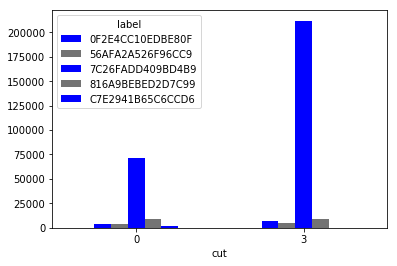

app2_visits label  0F2E4CC10EDBE80F  56AFA2A526F96CC9  7C26FADD409BD4B9  816A9BEBED2D7C99  C7E2941B65C6CCD6
cut                                                                                            
0                  3654              4059             82407              8998              1638
3                  7138              4895            200499              8814               655


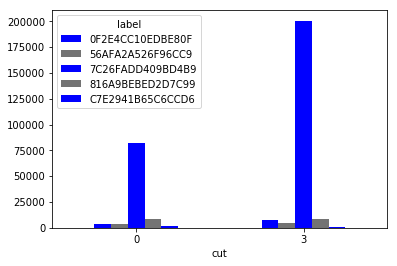

app3_visits label  0F2E4CC10EDBE80F  56AFA2A526F96CC9  7C26FADD409BD4B9  816A9BEBED2D7C99  C7E2941B65C6CCD6
cut                                                                                            
0                  3629              4344             51608              8243               126
3                  7163              4610            231298              9569              2167


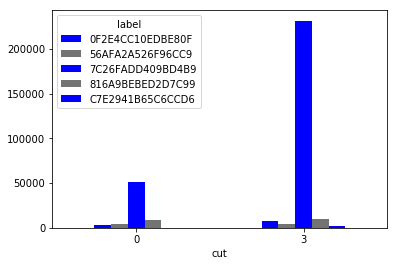

KeyboardInterrupt: 

In [28]:
def pct_rank_qcut(series, n):
    edages = pd.Series([i/n for i in range(n)])
    return series.rank(pct=1).astype(float).apply(lambda x: (edages >= x).argmax())
                         
                       
for var2 in ['app1_visits', 'app2_visits', 'app3_visits', 'app4_visits', 'app5_visits', 'app6_visits', 'app7_visits', 'app8_visits']:
    data2 = data.copy()
    
    if len(data2[var2].dropna().unique())>=10:
        data2['cut'] = pct_rank_qcut(data2[var2],5)
        cross6 = pd.crosstab(data2['cut'],data2['label'])
    else:
        cross6 = pd.crosstab(data2[var2],data2['label'])
    print(var2,cross6)
    cross6.plot(kind='bar',color=["blue","0.45"],rot=0)
    plt.show()

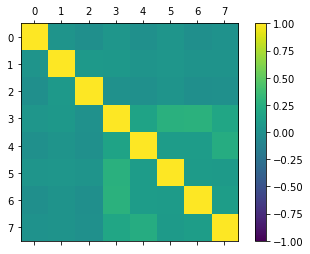

In [30]:
#关系矩阵图
appcols = ['app1_visits', 'app2_visits', 'app3_visits', 'app4_visits', 'app5_visits', 'app6_visits', 'app7_visits', 'app8_visits','label']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(data[appcols].corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
plt.show()

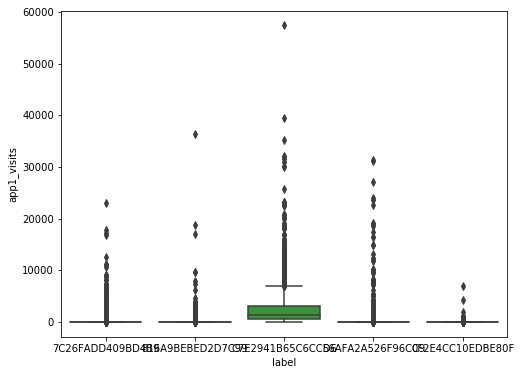

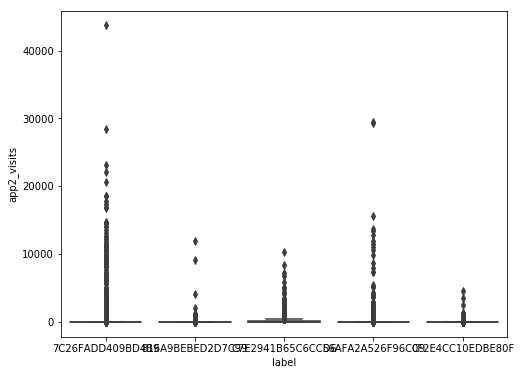

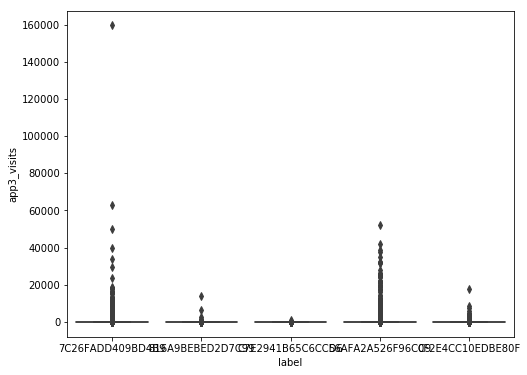

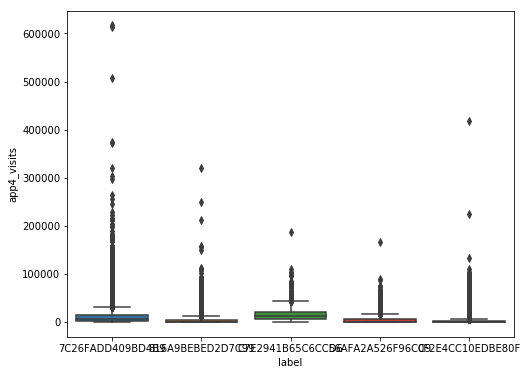

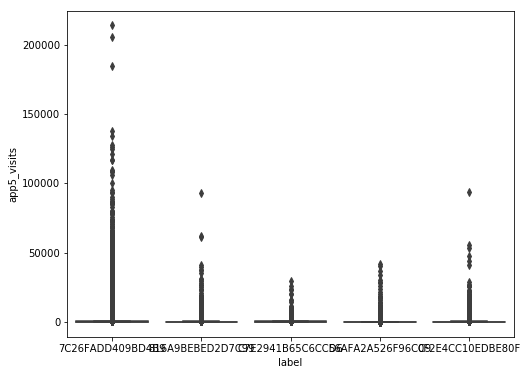

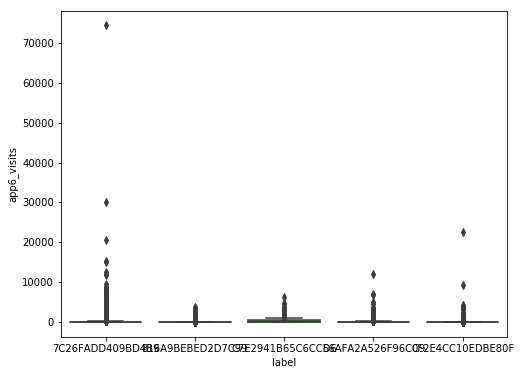

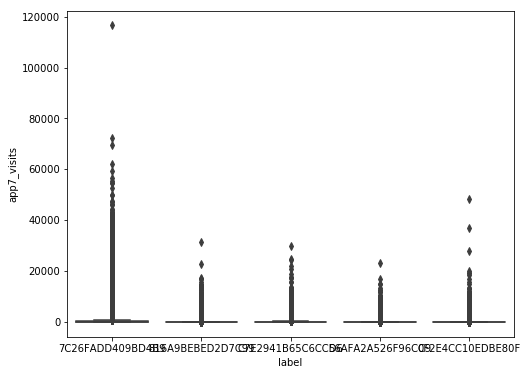

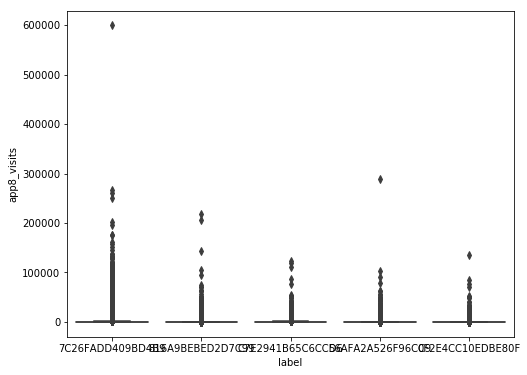

In [31]:
#分类和数值关系，画箱线图
appcols = ['app1_visits', 'app2_visits', 'app3_visits', 'app4_visits', 'app5_visits', 'app6_visits', 'app7_visits', 'app8_visits']
for var in appcols:
    data3 = pd.concat([data['label'], data[var]], axis=1)
# 画出箱线图
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x="label", y=var, data=data3)
    #fig.axis(ymin=0, ymax=700000)

    #print(data[data[var]<0][var].head())

### 产品数据分析
包括开通日期open_date ,是否上年未拍照用户 last_year_capture_user_flag,产品编码product_nbr


In [33]:
#开通日期也需要转为开通年龄 open_age
import datetime
data['open_date']
data['open_date'].fillna(value = 30000000 ,inplace=True) #空值让她和异常值一类，都使得age变为-1，所以设为负数
#data = data.drop('open_age', 1)
data.insert(0,'open_age',np.zeros(len(data['open_date'])))
now_year = datetime.datetime.today().year
def get_year(x):
    return int(x/10000)
data['open_age'] = data.apply(lambda x:now_year-get_year( x['open_date']),axis=1)
print(data['open_age'][:20])   
#年龄异常可能是错误数据，猜测是否是用于诈骗的
#data.loc[data['open_age']<=0,'age'] = -1 #data['age'].median()  
data.loc[data['open_age']<=0,'open_age']
#print(data['open_age'].describe())
#print(data['open_age'][:20])

0      5
1      8
2      6
3     16
4      4
5      3
6     18
7      1
8     11
9      2
10     2
11     2
12     2
13     8
14     3
15     6
16     2
17     1
18     3
19     2
Name: open_age, dtype: int64


215      -979
2063     -980
3013     -979
3916     -980
4467      -18
         ... 
319512   -980
321461   -980
322164   -980
322382   -980
322546   -980
Name: open_age, Length: 560, dtype: int64

In [34]:
#是否上年拍照为逻辑值，0或1 无异常
data['last_year_capture_user_flag'].unique()

array([0, 1])

In [35]:
#产品编码有很多取值，97个，暂时先丢掉这个特征
data['product_nbr'].unique()
s = data['product_nbr'].value_counts()
#pd.set_option('display.max_rows', None)
print(s[0:20])

378             34416
379             32046
101010301       16228
55              12812
3205            11501
10151010        11477
Z1180000045     11098
100110          10881
401010101001    10336
2339            10323
88              10312
41010300        10096
208511296       10057
1010301001      10054
2020966          9978
900000057        9656
539              9531
5001             9436
800000002        9097
900000001        9088
Name: product_nbr, dtype: int64


## 终端信息分析

#### 终端厂商可能会有关联关系，但不是主要的，可以作为辅助参考 

In [36]:
if os.name == "nt":
    dataPath = "%s\\test.csv" % homePath
else:
    dataPath = "%s/test.csv" % homePath
test = readData(dataPath)
pd.set_option('display.max_rows', None)
data['pro_brand'].unique()
data['pro_brand'].value_counts()
#空值就填为 “未知厂商”
test['pro_brand'].value_counts()


华为        20882
欧珀        14322
维沃        13657
Apple     11247
小米         4845
未知厂商       3768
三星         2132
众鑫百合        872
金立          425
中兴          404
深圳世纪天元      335
魅族          306
宇龙          293
TCL         275
深圳峰达通       273
海信          216
比酷          206
奇酷          168
联想          159
锤子科技        155
小天才         115
深圳广信         88
易丰展业         84
普瑞新科         81
红橙果          71
努比亚          70
华录           63
深安           61
老来宝          58
卡尔电气         46
启东优思         45
全盈通讯         45
侨兴           36
华唐           35
小辣椒          34
唐为           34
中维恒泰         34
诺而信          31
厦门美图         30
大成           30
力豪伟业         28
爱宝隆          27
洪洋伟业         27
青橙           27
乐视移动         26
摩托罗拉         26
深圳糖果         26
锐族           25
博瑞           23
优易           22
荣通盛凯         21
美翼景业         20
三源创新         19
浙江德景         19
步步高          18
信天游          18
华立时代         17
展翼           16
库麦           16
威铂通讯         16
天津通广         15
神奇工场         15
酷比      

In [37]:
data['term_model'].unique() 
#终端型号就太多了，可以先丢弃吧

array(['TCL-TCLCF203C', 'OB-OPPO R7c', 'HW-ATU AL10', ...,
       'SH-Saihon E300+', 'BLW-VE262', 'DC-DCT T5'], dtype=object)

#### 价格也是诈骗成本，也可能是相关因素吧，可以先作为特征

In [38]:
data['market_price'].value_counts()
data['market_price'].describe()
data.loc[data['market_price']==0].shape

(16648, 67)